# Cell shape analysis for cytokinesis data 

Data from: [Sedzinski et al., Nature, 2011](https://www.ncbi.nlm.nih.gov/pubmed/21822289)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import os, sys, glob

from IPython.display import HTML
from matplotlib import rc
rc('animation', html='html5')

%load_ext autoreload
%autoreload 2
import cellshapy

Reading config from /home/debacwa/.config/cellshapy


/home/debacwa/Work/cellshapy/cellshapy/config/features.py:23: UserWarning: Package mahotas is missing. Some features are not available


# Import data

In [2]:
data_folder = '/data/debacwa/cellshapy/dataset-cytokinesis'

- import annotation

In [3]:
import pandas as pd
import os
fn = os.path.join(data_folder, 'annotation.csv')
annotation = pd.read_csv(fn, index_col=0, squeeze=True).to_dict('records')

- import video data

In [4]:
filenames = os.path.join(data_folder, '*.tif')
vc = cellshapy.VideoCollection.from_glob(filenames, annotations=annotation, composite=True, normalize_distances=True)

Creating VideoCollection from glob expression /data/debacwa/cellshapy/dataset-cytokinesis/*.tif: 20 video files or directories
Creating VideoCollection from list of paths. 20 video files or directories


Iteration 2, error: 0.000043, time: 3.12 sec
2500 contours aligned in 4.77 sec


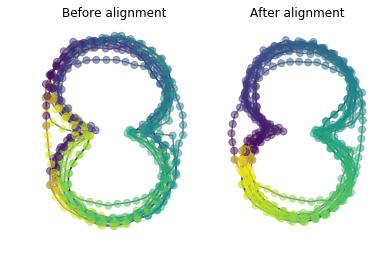

In [5]:
_ = vc.align_contours(show_samples=10)

In [6]:
# rotate shapes by 90 degrees
vc.rotate_shapes(degrees=-90)

# Shape analysis

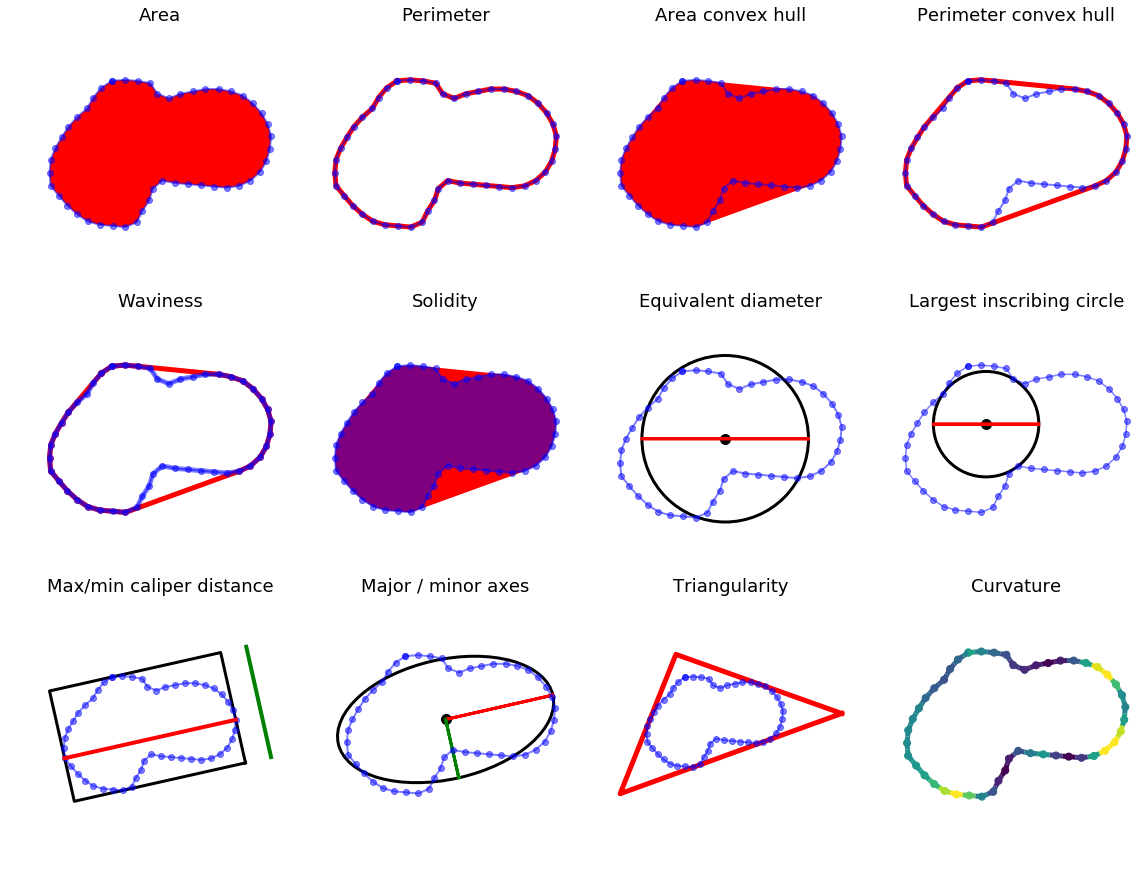

In [8]:
from cellshapy.utils.contours import extract_shape_descriptors
_ = vc[-2][-2].extract_shape_descriptors(plot=True, skeleton=False)

# Morph analysis

## VAE

/home/debacwa/Work/cellshapy/cellshapy/data/videocollection.py:717: UserWarning: VAE is experimental! Limited compatibility.
/home/debacwa/Work/cellshapy/cellshapy/analysis/vae.py:66: UserWarning: Tensor was zero-padded from (20, 125, 96) to (20, 128, 96).


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


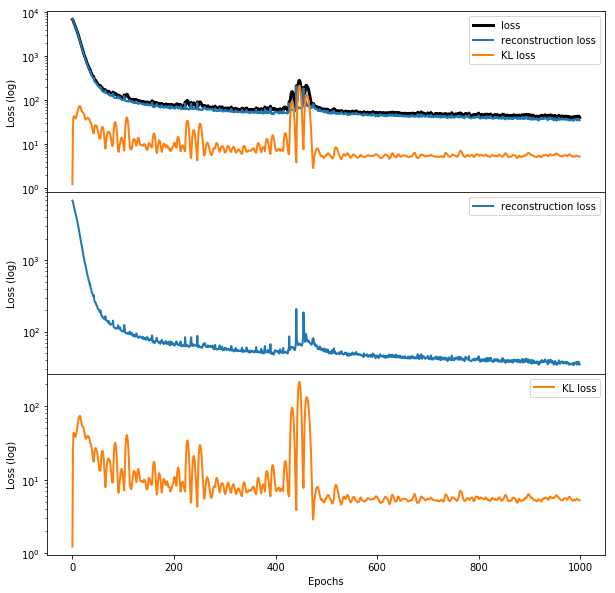

In [9]:
format = 'stxy'
vc.embed_morphs(format, 'vae', n_components=32, plot=False, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 4 components to 2D using pca.


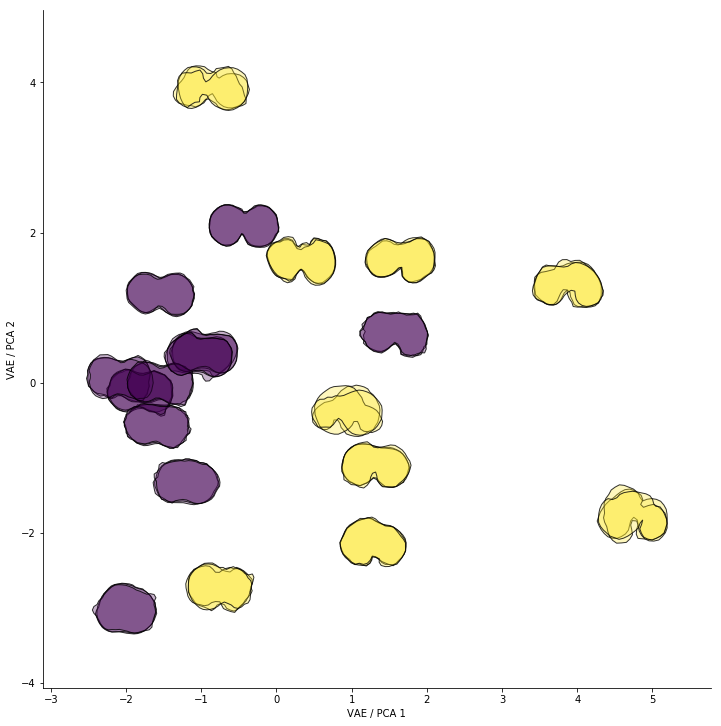

In [14]:
f=30
fig = vc.morph_space(format, 'vae', animate=False, frames=[f,f+10,f+20], 
                         shape_size=70, alpha_face=0.3, alpha_edge=0.7, colorcode='label', projection='pca')

<StemContainer object of 3 artists>

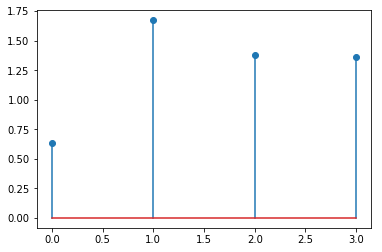

In [15]:
embeddings = vc.embedding[('stxy', 'vae')]
fig, ax = plt.subplots(1,1)
#ax.scatter(range(emb.shape[1]), np.mean(emb, axis=0), s=20, c='k')
#ax.vlines(range(emb.shape[1]), ymin=np.mean(emb, axis=0)-np.std(emb, axis=0), ymax=np.mean(emb, axis=0)+np.std(emb, axis=0))
ax.stem(range(embeddings.shape[1]), np.std(embeddings, axis=0))


## Parafac

`parafac` embedding for `stxy` done (0.15 s).


Using numpy backend.


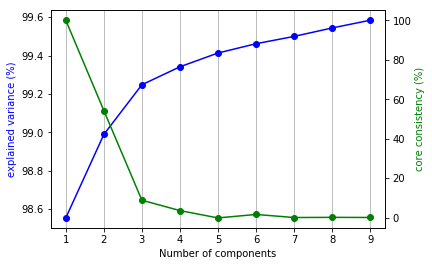

core consistency  explained variance
n_components                                      
1                   100.000000           98.554045
2                    54.251674           98.988803
3                     8.823055           99.247710
4                     3.573781           99.341307
5                    -0.140774           99.413067
6                     1.612002           99.461541
7                     0.058651           99.499605
8                     0.142241           99.543593
9                     0.085729           99.583847

In [16]:
vc.embed_morphs(format, 'parafac', n_components=2, save_embedding=True, plot=False)
df_corcondia, _ = vc.parafac_diagnostics(format, max_components=10)
df_corcondia

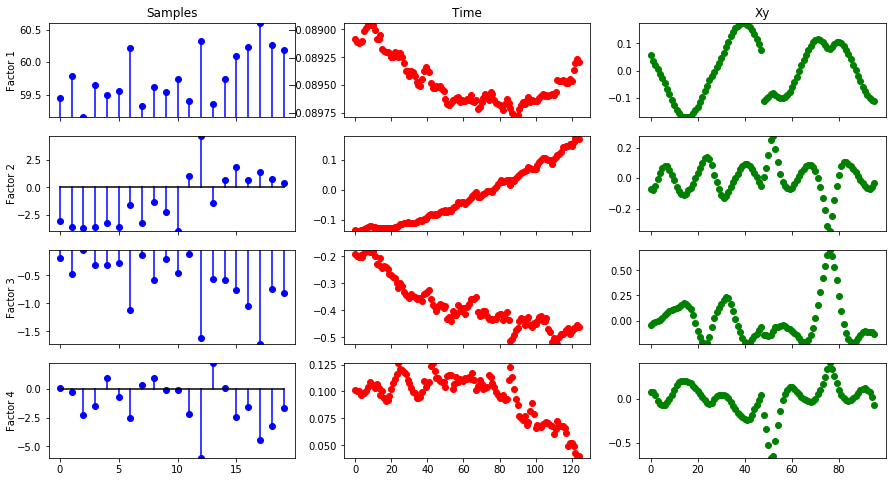

In [34]:
vc.embed_morphs(format, 'parafac', n_components=4, plot=True, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 4 components to 2D using pca.


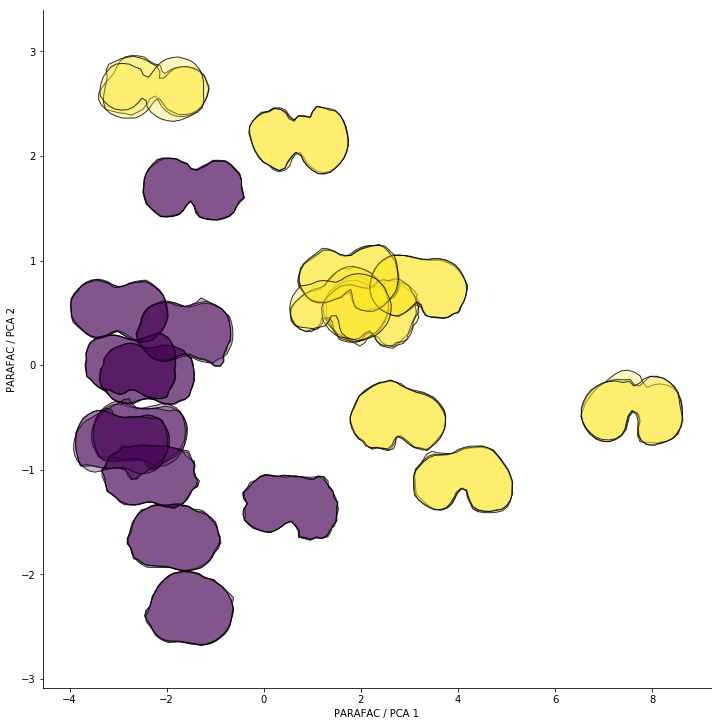

In [36]:
fig = vc.morph_space(format, 'parafac', animate=False, frames=[f,f+2,f+4], 
                         shape_size=100, alpha_face=0.3, alpha_edge=0.7, colorcode='label', projection='pca')

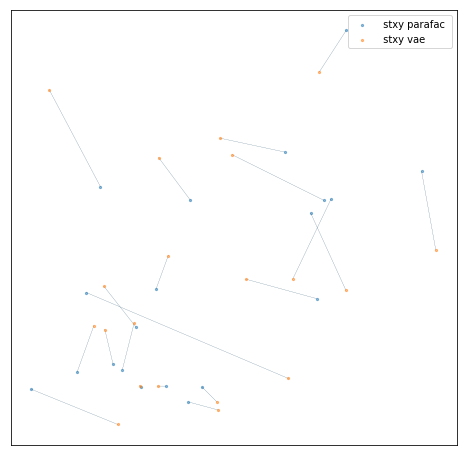

0.9811383182468509

In [37]:
vc.compare_embeddings(('stxy', 'parafac'),('stxy', 'vae'))

## Tucker

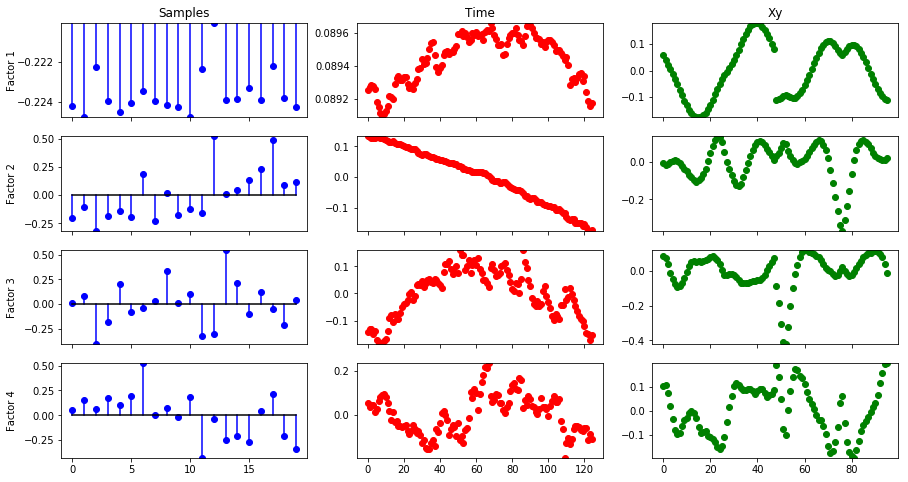

In [94]:
vc.embed_morphs(format, 'tucker', n_components=4, plot=True, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 4 components to 2D using pca.


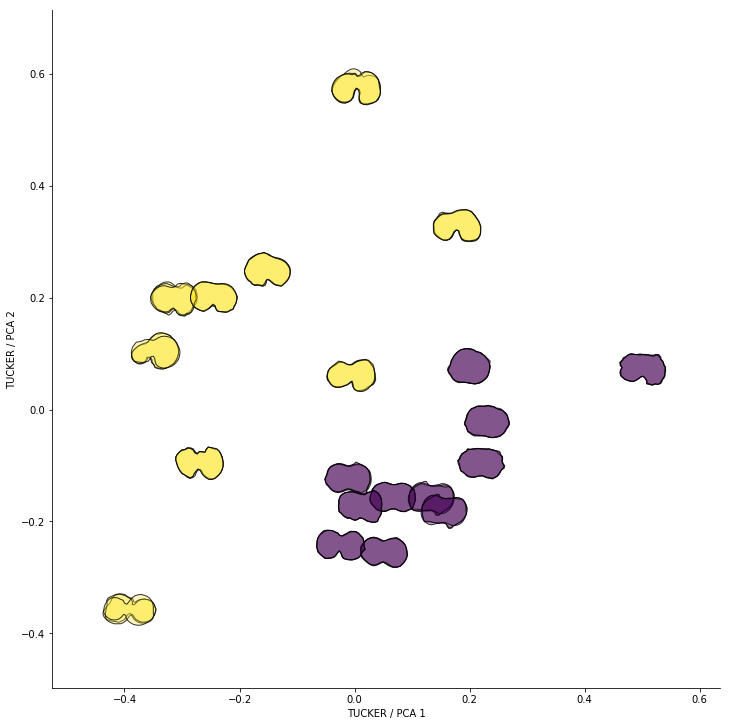

In [95]:
fig = vc.morph_space(format, 'tucker', animate=False, frames=[f,f+2,f+4], 
                         shape_size=50, alpha_face=0.3, alpha_edge=0.7, colorcode='label', projection='pca')

num_frames = 125


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:375: UserWarning: Projecting from 4 components to 2D using umap.
/home/debacwa/miniconda3/envs/cellshapy/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)


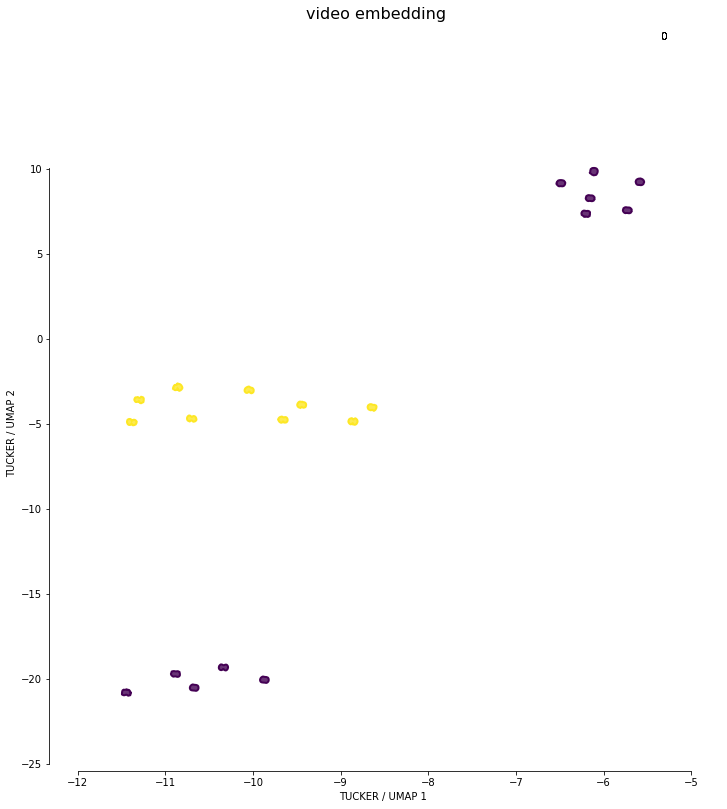

In [87]:
labels = vc.get_annotations_videos('label')
anim = vc.morph_space('stxy', 'tucker', projection='umap', labels=labels, shape_size=50, alpha_edge=1.0, alpha_face=0.8, colorcode='label')
anim

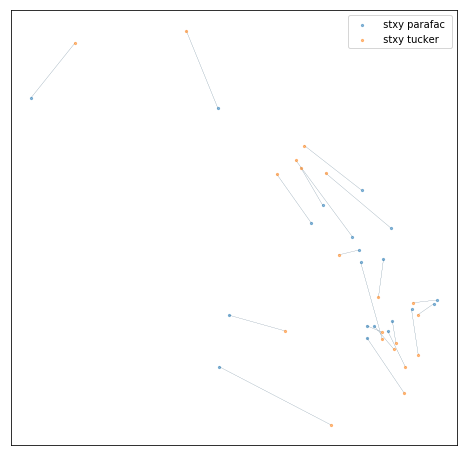

1.0583344368187435

In [42]:
vc.compare_embeddings(('stxy', 'parafac'),('stxy', 'tucker'))

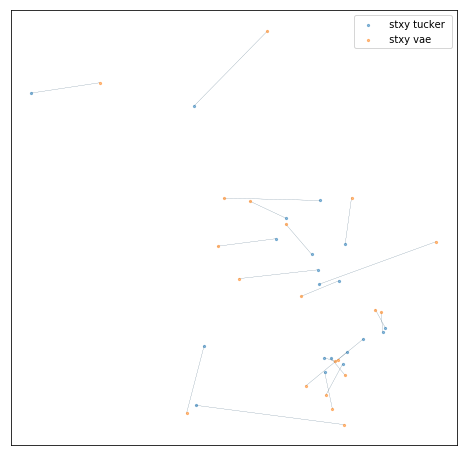

1.130181253529923

In [43]:
vc.compare_embeddings(('stxy', 'tucker'),('stxy', 'vae'))